In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

vehicle wise - downtime, issues and count of issues, span of issue 

In [2]:
data=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/Vehicle Repair Dashboard/Service Record-Grid view (1).csv")

In [3]:
data['Registration Number'].nunique()

613

613 cars total went to 

In [4]:
data['Date Sent'] = pd.to_datetime(data['Date Sent'], dayfirst=True, errors='coerce')

# Create a new column for the month
data['Month'] = data['Date Sent'].dt.month

# Display the updated DataFrame
print(data)

      SL No. Registration Number Delivery Date (from Registration Number)  \
0          1           WB07K0548                                1/10/2022   
1          2           WB05A0177                                25/1/2023   
2          3           WB05A0881                                25/5/2023   
3          4           WB05A0911                                30/5/2023   
4          5           WB07K0251                                22/7/2022   
...      ...                 ...                                      ...   
2332    2394           WB05A0893                                29/5/2023   
2333    2395           WB07K2080                               23/12/2023   
2334    2396           WB04J2467                               28/11/2023   
2335    2397           WB05A1878                               27/11/2023   
2336    2398           WB05A0857                                 3/6/2023   

      Current Vehicle Age in Months            Model         Hub  Date Sent

In [5]:
data['Month']

0       7.0
1       7.0
2       7.0
3       7.0
4       7.0
       ... 
2332    NaN
2333    5.0
2334    5.0
2335    5.0
2336    NaN
Name: Month, Length: 2337, dtype: float64

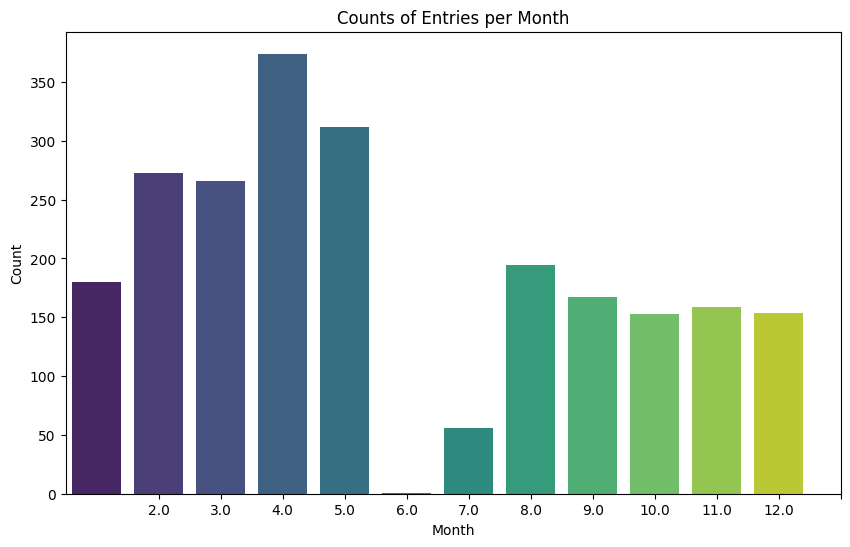

In [6]:
import seaborn as sns
month_counts = data['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts of Entries per Month')
plt.xticks(month_counts.index)  
plt.show()

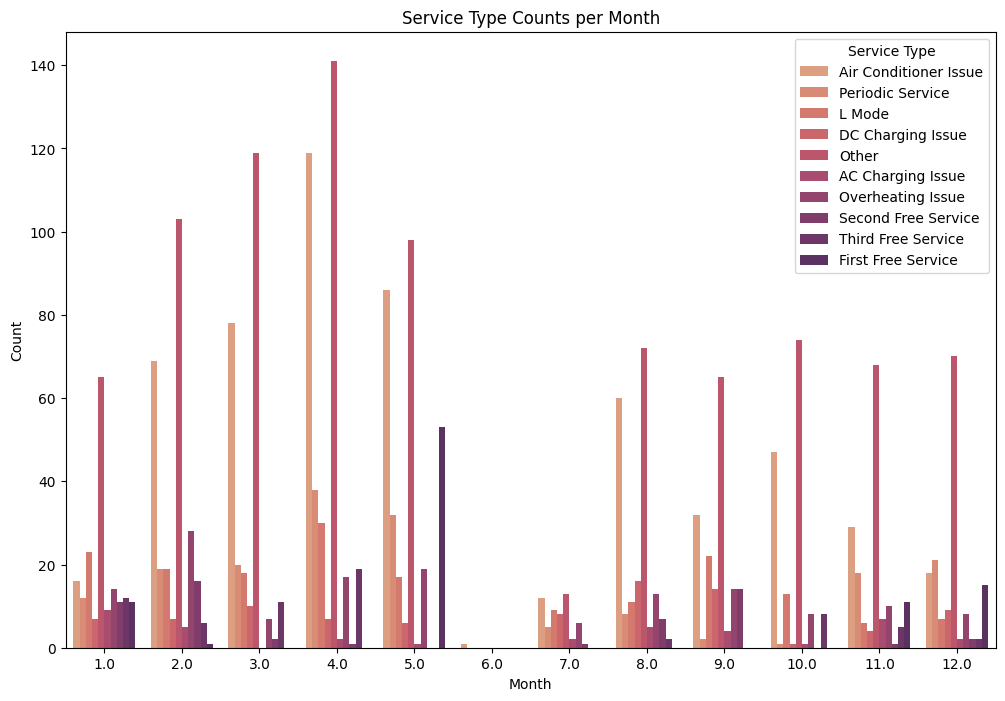

In [7]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Month', hue='Service Type', palette='flare')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Service Type Counts per Month')
plt.legend(title='Service Type')
plt.show()

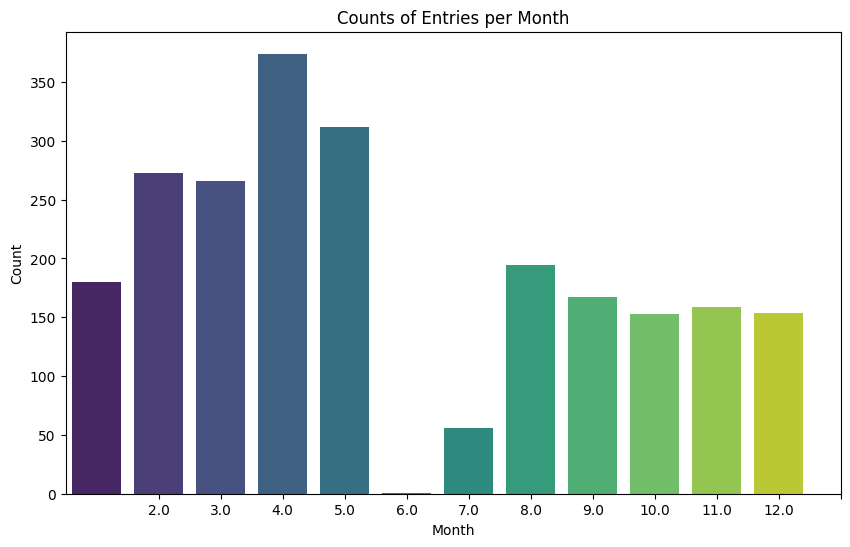

In [8]:
month_counts = data['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts of Entries per Month')
plt.xticks(month_counts.index)  
plt.show()

In [9]:
data['Service Type']

0       Air Conditioner Issue
1       Air Conditioner Issue
2            Periodic Service
3                      L Mode
4       Air Conditioner Issue
                ...          
2332    Air Conditioner Issue
2333    Air Conditioner Issue
2334    Air Conditioner Issue
2335                    Other
2336    Air Conditioner Issue
Name: Service Type, Length: 2337, dtype: object

In [10]:
data['Service Type'].value_counts()

Service Type
Other                    910
Air Conditioner Issue    578
Periodic Service         180
L Mode                   176
Overheating Issue        147
First Free Service        93
DC Charging Issue         89
Third Free Service        66
Second Free Service       55
AC Charging Issue         41
Name: count, dtype: int64

600 mei 2200

In [11]:
issue_counts = data.pivot_table(index='Registration Number', columns='Service Type', aggfunc='size', fill_value=0)

issue_counts_dict = issue_counts.to_dict(orient='index')

for reg_num, issues in issue_counts_dict.items():
    print(f"{reg_num}: {issues}")

WB04J0905: {'AC Charging Issue': 0, 'Air Conditioner Issue': 2, 'DC Charging Issue': 0, 'First Free Service': 0, 'L Mode': 0, 'Other': 4, 'Overheating Issue': 0, 'Periodic Service': 0, 'Second Free Service': 0, 'Third Free Service': 0}
WB04J0909: {'AC Charging Issue': 0, 'Air Conditioner Issue': 5, 'DC Charging Issue': 0, 'First Free Service': 0, 'L Mode': 0, 'Other': 2, 'Overheating Issue': 0, 'Periodic Service': 0, 'Second Free Service': 0, 'Third Free Service': 0}
WB04J0910: {'AC Charging Issue': 0, 'Air Conditioner Issue': 3, 'DC Charging Issue': 0, 'First Free Service': 0, 'L Mode': 1, 'Other': 3, 'Overheating Issue': 0, 'Periodic Service': 0, 'Second Free Service': 0, 'Third Free Service': 0}
WB04J0915: {'AC Charging Issue': 0, 'Air Conditioner Issue': 4, 'DC Charging Issue': 0, 'First Free Service': 0, 'L Mode': 1, 'Other': 2, 'Overheating Issue': 0, 'Periodic Service': 0, 'Second Free Service': 0, 'Third Free Service': 0}
WB04J0925: {'AC Charging Issue': 0, 'Air Conditioner Iss

In [12]:
data['Registration Number'].value_counts()[data['Registration Number'].value_counts()==5].index

Index(['WB07K0521', 'WB07K0361', 'WB05A0912', 'WB07K0276', 'WB07K0498',
       'WB05A0216', 'WB07K2080', 'WB07K1475', 'WB07K1264', 'WB07K0347',
       'WB05A0949', 'WB05A0879', 'WB05A0934', 'WB05A0330', 'WB07K0465',
       'WB07K1018', 'WB07K1289', 'WB05A2158', 'WB07K1526', 'WB07K1165',
       'WB05A0908', 'WB07K0456', 'WB07K0530', 'WB05A0250', 'WB05A0852',
       'WB07K0257', 'WB07K0433', 'WB07K0581', 'WB07K1138', 'WB07K1175',
       'WB05A1669', 'WB05A0239', 'WB07K1203', 'WB05A1636', 'WB07K0524',
       'WB05A0857', 'WB07K0297', 'WB05A0868', 'WB04J2211', 'WB07K1162',
       'WB07K0457', 'WB07K0472', 'WB05A1744', 'WB07K1222', 'WB07K0455',
       'WB05A0881', 'WB05A0271', 'WB07K0337', 'WB07K1267', 'WB04J0931',
       'WB07K0499', 'WB07K0484', 'WB07K1023', 'WB07K1464', 'WB04J0987'],
      dtype='object', name='Registration Number')

In [13]:
data['Registration Number'].value_counts().describe()

count    613.000000
mean       3.809135
std        2.562509
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       15.000000
Name: count, dtype: float64

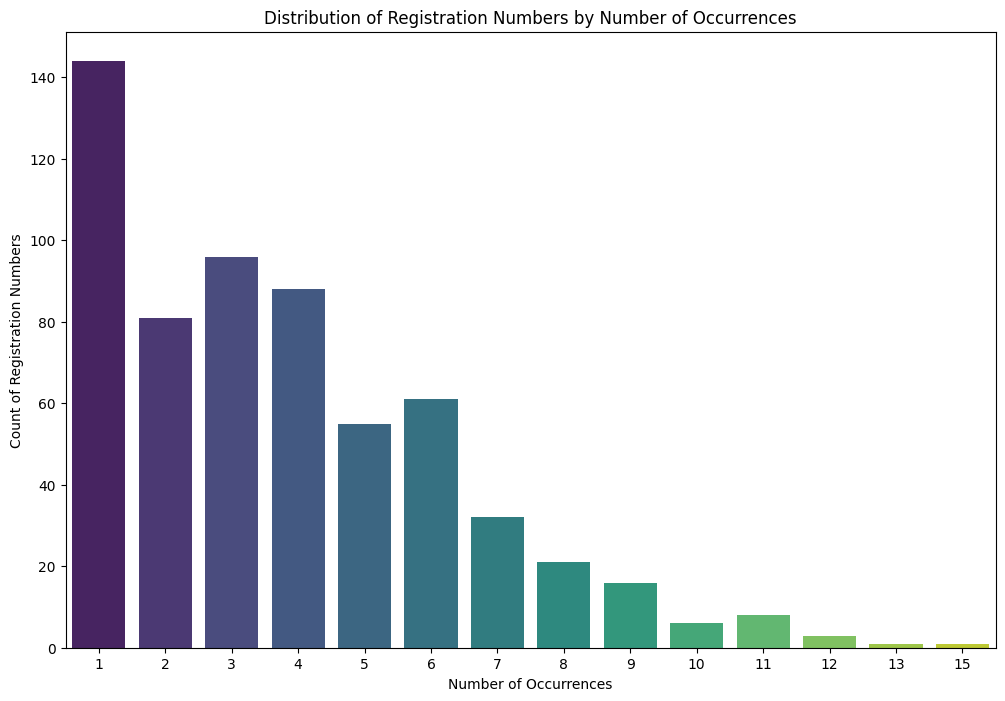

In [14]:
registration_counts = data['Registration Number'].value_counts()

count_of_counts = registration_counts.value_counts()

sorted_count_of_counts = count_of_counts.sort_index(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_count_of_counts.index, y=sorted_count_of_counts.values, palette='viridis')
plt.xlabel('Number of Occurrences')
plt.ylabel('Count of Registration Numbers')
plt.title('Distribution of Registration Numbers by Number of Occurrences')
plt.show()

In [15]:
data['Model'].value_counts()

Model
Xpres-T Ziptron    1383
Xpres-T Electra     795
eC3                 157
Name: count, dtype: int64

In [16]:
unique_vendors_per_vehicle = data.groupby('Registration Number')['Service Vendors'].nunique()
print(unique_vendors_per_vehicle)

Registration Number
WB04J0905    2
WB04J0909    3
WB04J0910    3
WB04J0915    3
WB04J0925    2
            ..
WB19L7529    1
WB19L7534    1
WB19L7538    1
WB19L7549    1
WB19L7693    1
Name: Service Vendors, Length: 613, dtype: int64


In [17]:
unique_vendors_per_vehicle.mean()

1.6851549755301793

In [18]:
issue_counts = data.pivot_table(index='Registration Number', columns='Service Type', aggfunc='size', fill_value=0)

issue_counts_dict = issue_counts.to_dict(orient='index')

issue_counts_list = []

for reg_num, issues in issue_counts_dict.items():
    issues_str = ", ".join(f"{issue}: {count}" for issue, count in issues.items())
    issue_counts_list.append(f"{reg_num}: {issues_str}")

for entry in issue_counts_list:
    print(entry)


WB04J0905: AC Charging Issue: 0, Air Conditioner Issue: 2, DC Charging Issue: 0, First Free Service: 0, L Mode: 0, Other: 4, Overheating Issue: 0, Periodic Service: 0, Second Free Service: 0, Third Free Service: 0
WB04J0909: AC Charging Issue: 0, Air Conditioner Issue: 5, DC Charging Issue: 0, First Free Service: 0, L Mode: 0, Other: 2, Overheating Issue: 0, Periodic Service: 0, Second Free Service: 0, Third Free Service: 0
WB04J0910: AC Charging Issue: 0, Air Conditioner Issue: 3, DC Charging Issue: 0, First Free Service: 0, L Mode: 1, Other: 3, Overheating Issue: 0, Periodic Service: 0, Second Free Service: 0, Third Free Service: 0
WB04J0915: AC Charging Issue: 0, Air Conditioner Issue: 4, DC Charging Issue: 0, First Free Service: 0, L Mode: 1, Other: 2, Overheating Issue: 0, Periodic Service: 0, Second Free Service: 0, Third Free Service: 0
WB04J0925: AC Charging Issue: 0, Air Conditioner Issue: 0, DC Charging Issue: 0, First Free Service: 0, L Mode: 1, Other: 3, Overheating Issue: 

In [19]:

processed_dict = {}

for reg_num, issues in issue_counts_dict.items():
    # Filter out keys with values of 0
    filtered_issues = {k: v for k, v in issues.items() if v != 0}
    # Calculate the total of non-zero values
    total = sum(filtered_issues.values())
    # Add the total to the dictionary
    filtered_issues['Total'] = total
    # Store the processed dictionary
    processed_dict[reg_num] = filtered_issues

# Convert the processed dictionary to a list of formatted strings
issue_counts_list = []

for reg_num, issues in processed_dict.items():
    issues_str = ", ".join(f"{issue}: {count}" for issue, count in issues.items())
    issue_counts_list.append(f"{reg_num}: {issues_str}")

# Print the resulting list
for entry in issue_counts_list:
    print(entry)


WB04J0905: Air Conditioner Issue: 2, Other: 4, Total: 6
WB04J0909: Air Conditioner Issue: 5, Other: 2, Total: 7
WB04J0910: Air Conditioner Issue: 3, L Mode: 1, Other: 3, Total: 7
WB04J0915: Air Conditioner Issue: 4, L Mode: 1, Other: 2, Total: 7
WB04J0925: L Mode: 1, Other: 3, Total: 4
WB04J0931: AC Charging Issue: 1, Other: 3, Third Free Service: 1, Total: 5
WB04J0935: AC Charging Issue: 1, Air Conditioner Issue: 3, Other: 2, Overheating Issue: 1, Total: 7
WB04J0939: L Mode: 1, Other: 1, Periodic Service: 1, Total: 3
WB04J0943: Air Conditioner Issue: 1, L Mode: 2, Other: 3, Overheating Issue: 1, Total: 7
WB04J0946: Air Conditioner Issue: 1, Other: 3, Total: 4
WB04J0949: Air Conditioner Issue: 3, L Mode: 1, Total: 4
WB04J0957: Air Conditioner Issue: 2, L Mode: 2, Other: 2, Total: 6
WB04J0963: Air Conditioner Issue: 1, Other: 3, Overheating Issue: 2, Total: 6
WB04J0969: Air Conditioner Issue: 4, Other: 1, Periodic Service: 2, Total: 7
WB04J0974: DC Charging Issue: 1, Other: 2, Total: 3


In [20]:
issue_counts_df = pd.DataFrame(issue_counts_list)


In [21]:
issue_counts_df.to_excel('issue_counts_list.xlsx', index=False)


In [22]:
issue_counts_list.to_excel('issue_counts_list.xlsx', index=False)


AttributeError: 'list' object has no attribute 'to_excel'

In [23]:
data = data[~data['Record ID'].isin(['recV205C9HaOOXIxz', 'recLQe923TZsumkjK'])]

In [24]:
import numpy as np

# Grouping the data by 'Driver ID'
grouped = repair_req.groupby('Driver ID')

# Define custom aggregation functions
agg_functions = {
    'Invoice Amount': 'sum',
    'Downtime (Days)': 'sum',
    'Damage Type': lambda x: (x.str.lower().str.contains('major')).sum(),
    'Our Cost': 'sum',
    'Incident Date': ['first', 'last', 'count']
}

# Apply the aggregation functions to the grouped data
result = grouped.agg(agg_functions)

# Rename the columns for better readability
result.columns = ['Total Invoice Amount', 
                  'Total Downtime (Days)', 
                  'Count of Major Damage Types', 
                  'Total Our Cost', 
                  'First Incident Date', 
                  'Last Incident Date', 
                  'Number of Incidents']

# Calculate average span between two accidents

# Display the result
print(result)


NameError: name 'repair_req' is not defined

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2335 non-null   int64         
 1   Registration Number                                       2333 non-null   object        
 2   Delivery Date (from Registration Number)                  2333 non-null   object        
 3   Current Vehicle Age in Months                             2333 non-null   float64       
 4   Model                                                     2333 non-null   object        
 5   Hub                                                       2333 non-null   object        
 6   Date Sent                                                 2287 non-null   datetime64[ns]
 7   Date Received                                  

In [26]:
grouped = data.groupby('Registration Number')

In [27]:
groups_with_multiple_repairs = [group for _, group in grouped if len(group) > 1]

In [28]:
import pandas as pd

avg_spans = []
for group in groups_with_multiple_repairs:
    # Sort the group by the 'Date Sent' column
    group = group.sort_values(by='Date Sent')
    
    # Calculate the difference between consecutive 'Date Sent' values
    spans = group['Date Sent'].diff()[1:].dt.days
    
    # Append the average span for this car
    avg_spans.append(spans.mean())

In [29]:
result = pd.DataFrame({'Registration Number': [group['Registration Number'].iloc[0] for group in groups_with_multiple_repairs],
                       'Average Span Between Repairs (days)': avg_spans})

In [30]:
print(result)

    Registration Number  Average Span Between Repairs (days)
0             WB04J0905                            37.800000
1             WB04J0909                            47.000000
2             WB04J0910                            55.400000
3             WB04J0915                            42.833333
4             WB04J0925                            71.333333
..                  ...                                  ...
464           WB19L7423                            33.000000
465           WB19L7424                            57.666667
466           WB19L7538                            63.000000
467           WB19L7549                            56.000000
468           WB19L7693                            53.000000

[469 rows x 2 columns]


In [31]:
result.to_excel("average_span_between_repairs.xlsx",index=False)

In [32]:
result['Average Span Between Repairs (days)'].describe()

count    465.000000
mean      58.592084
std       36.241626
min        1.000000
25%       35.000000
50%       50.400000
75%       71.666667
max      236.000000
Name: Average Span Between Repairs (days), dtype: float64

month on month service
issues wise - avg span m/m
avg downtime by service center and issue wise

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2335 non-null   int64         
 1   Registration Number                                       2333 non-null   object        
 2   Delivery Date (from Registration Number)                  2333 non-null   object        
 3   Current Vehicle Age in Months                             2333 non-null   float64       
 4   Model                                                     2333 non-null   object        
 5   Hub                                                       2333 non-null   object        
 6   Date Sent                                                 2287 non-null   datetime64[ns]
 7   Date Received                                  

In [34]:
import pandas as pd

# Convert 'Date Sent' to datetime
data['Date Sent'] = pd.to_datetime(data['Date Sent'])

# Extract month from 'Date Sent'
data['Month'] = data['Date Sent'].dt.month

# Group the data by month and service type, and calculate the mean downtime
downtime_by_month_service = data.groupby(['Month', 'Service Type'])['Downtime'].mean().reset_index()

# Rename the columns
downtime_by_month_service.columns = ['Month', 'Service Type', 'Average Downtime']

# Sort the DataFrame
downtime_by_month_service = downtime_by_month_service.sort_values(['Month', 'Service Type'])

In [35]:
downtime_by_month_service

,Month,Service Type,Average Downtime
0,1.0,AC Charging Issue,0.444444
1,1.0,Air Conditioner Issue,0.312500
2,1.0,DC Charging Issue,1.142857
3,1.0,First Free Service,0.000000
4,1.0,L Mode,1.521739
...,...,...,...
94,12.0,Other,0.942857
95,12.0,Overheating Issue,0.875000
96,12.0,Periodic Service,0.142857
97,12.0,Second Free Service,0.000000


In [36]:
downtime_by_month_service.to_excel("downtime_by_month_service.xlsx", index=False)

In [37]:
downtime_by_service = data.groupby('Service Type')['Downtime'].mean().reset_index()


In [38]:
downtime_by_service

,Service Type,Downtime
0,AC Charging Issue,1.289474
1,Air Conditioner Issue,1.194545
2,DC Charging Issue,3.595506
3,First Free Service,0.076923
4,L Mode,4.162791
5,Other,1.163242
6,Overheating Issue,1.085106
7,Periodic Service,-1.252874
8,Second Free Service,-0.127273
9,Third Free Service,-0.296875


In [39]:
data[data['Service Type']=='Third Free Service']['Downtime'].describe()

count    64.000000
mean     -0.296875
std       3.934704
min     -31.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: Downtime, dtype: float64

In [40]:
data[data['Downtime']==-665472.000000]

,SL No.,Registration Number,Delivery Date (from Registration Number),Current Vehicle Age in Months,Model,Hub,Date Sent,Date Received,Received Month/Year,Vehicle Age At Service Time,...,Last Modified By,Last Modified,Hub Manager Emails (from Hub) (from Registration Number),Rejection Reason,Sent Month/Year,Maintenance Remarks,Service KM Reading,Vehicle Status (from Registration Number),Record ID,Month


In [41]:
data = data[~data['Record ID'].isin(['recV205C9HaOOXIxz', 'recLQe923TZsumkjK'])]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2335 non-null   int64         
 1   Registration Number                                       2333 non-null   object        
 2   Delivery Date (from Registration Number)                  2333 non-null   object        
 3   Current Vehicle Age in Months                             2333 non-null   float64       
 4   Model                                                     2333 non-null   object        
 5   Hub                                                       2333 non-null   object        
 6   Date Sent                                                 2287 non-null   datetime64[ns]
 7   Date Received                                  

In [43]:
downtime_by_service_vendor = data.groupby('Service Vendors')['Downtime'].mean().reset_index()


In [44]:
downtime_by_service_vendor

,Service Vendors,Downtime
0,Automovill,0.312500
1,Celica Motorcorp,0.737589
2,Dulichand,1.132265
3,KB Motors,0.647059
4,My Carz Studio,0.428571
5,Rangeview Motors,1.227941
6,Speedy Autocare,1.421875
7,TC Motors Foreshore Road,1.249033
8,TC Motors Rajarhat,2.276596
9,swift wrench car service,0.285714


In [45]:
downtime_by_service_vendor.to_excel('downtime_by_service_vendor.xlsx',index=False)

In [46]:
downtime_by_service_vendor_type = data.groupby(['Service Type','Service Vendors'])['Downtime'].mean().reset_index()


In [47]:
downtime_by_service_vendor_type

,Service Type,Service Vendors,Downtime
0,AC Charging Issue,Dulichand,1.666667
1,AC Charging Issue,Rangeview Motors,1.000000
2,AC Charging Issue,TC Motors Foreshore Road,1.264706
3,Air Conditioner Issue,Automovill,1.000000
4,Air Conditioner Issue,Celica Motorcorp,1.714286
...,...,...,...
56,Second Free Service,TC Motors Rajarhat,0.000000
57,Third Free Service,Celica Motorcorp,0.400000
58,Third Free Service,Dulichand,0.100000
59,Third Free Service,Rangeview Motors,0.117647


In [48]:
downtime_by_service_vendor_type.to_excel('downtime_by_service_vendor_type.xlsx', index=False)


In [49]:
result

,Registration Number,Average Span Between Repairs (days)
0,WB04J0905,37.800000
1,WB04J0909,47.000000
2,WB04J0910,55.400000
3,WB04J0915,42.833333
4,WB04J0925,71.333333
...,...,...
464,WB19L7423,33.000000
465,WB19L7424,57.666667
466,WB19L7538,63.000000
467,WB19L7549,56.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2335 non-null   int64         
 1   Registration Number                                       2333 non-null   object        
 2   Delivery Date (from Registration Number)                  2333 non-null   object        
 3   Current Vehicle Age in Months                             2333 non-null   float64       
 4   Model                                                     2333 non-null   object        
 5   Hub                                                       2333 non-null   object        
 6   Date Sent                                                 2287 non-null   datetime64[ns]
 7   Date Received                                  

In [51]:
data.head()

,SL No.,Registration Number,Delivery Date (from Registration Number),Current Vehicle Age in Months,Model,Hub,Date Sent,Date Received,Received Month/Year,Vehicle Age At Service Time,...,Last Modified By,Last Modified,Hub Manager Emails (from Hub) (from Registration Number),Rejection Reason,Sent Month/Year,Maintenance Remarks,Service KM Reading,Vehicle Status (from Registration Number),Record ID,Month
0,1,WB07K0548,1/10/2022,19.0,Xpres-T Electra,Khiderpore,2023-07-21,5/8/2023,08/2023,293.0,...,subhajit basak,5/8/2023 12:55pm,"gangulysagar67@gmail.com,sagardas1707@gmail.co...",NaN,07/2023,NaN,NaN,Running,recs10eh8smjEZ2b9,7.0
1,2,WB05A0177,25/1/2023,15.0,Xpres-T Ziptron,EVRE,2023-07-20,22/7/2023,07/2023,176.0,...,subhajit basak,22/7/2023 12:55pm,"rajamahato1505@gmail.com,mrigankaguha.com@gmai...",NaN,07/2023,NaN,NaN,Running,recjOVOk02NNWzy15,7.0
2,3,WB05A0881,25/5/2023,11.0,Xpres-T Ziptron,NDITA,2023-07-21,26/7/2023,07/2023,57.0,...,subhajit basak,26/7/2023 5:59pm,"ajitk13496@gmail.com,nurul.vms@gmail.com,sagar...",NaN,07/2023,NaN,NaN,Running,rec1b3yuAiiGn69Ag,7.0
3,4,WB05A0911,30/5/2023,11.0,Xpres-T Ziptron,O2,2023-07-20,17/8/2023,08/2023,51.0,...,subhajit basak,14/9/2023 11:37am,"sanojkumar.singh@snapecabs.com,jagmeet.singh@s...",NaN,07/2023,NaN,NaN,Running,recZrxgA6t2bHDzPo,7.0
4,5,WB07K0251,22/7/2022,22.0,Xpres-T Electra,HIDCO,2023-07-21,21/7/2023,07/2023,364.0,...,subhajit basak,21/7/2023 5:22pm,"dsubho49@gmail.com,atanudey181@gmail.com,anirb...",NaN,07/2023,NaN,NaN,Running,recOy5Xr7sk5vvy7h,7.0


issue classifier and issue-wise average.

In [52]:
data['Other\'s Data'].info()

<class 'pandas.core.series.Series'>
Index: 2335 entries, 0 to 2336
Series name: Other's Data
Non-Null Count  Dtype 
--------------  ----- 
908 non-null    object
dtypes: object(1)
memory usage: 36.5+ KB


SL No.	Registration Number	Delivery Date (from Registration Number)	Current Vehicle Age in Months	Model	Hub	Date Sent	Date Received	Received Month/Year	Vehicle Age At Service Time	Downtime	Service Vendors	Service Type	Other's Data	Approval Status	Invoice Number	Invoice Amount	Invoice	Invoice Payment Status	Created By	Created	Last Modified By	Last Modified	Hub Manager Emails (from Hub) (from Registration Number)	Rejection Reason	Sent Month/Year	Maintenance Remarks	Service KM Reading	Vehicle Status (from Registration Number)	Record ID

In [54]:
most_downtime=data.groupby('Registration Number')['Downtime'].sum()

In [57]:
most_downtime.sort_values(ascending=False)

Registration Number
WB05A0873    136.0
WB07K0369     88.0
WB05A0966     68.0
WB05A0917     51.0
WB05A0949     43.0
             ...  
WB05A1636     -1.0
WB07K1196     -6.0
WB19L7422    -29.0
WB07K1816    -31.0
WB05A0868   -272.0
Name: Downtime, Length: 613, dtype: float64

In [61]:
data[data['Downtime']<0]

36       -1.0
342      -1.0
846      -7.0
971     -31.0
1020     -1.0
1046     -1.0
1166   -274.0
1200    -29.0
1227     -1.0
1313     -1.0
1343     -1.0
1434     -1.0
1668     -2.0
2005     -1.0
2116     -1.0
Name: Downtime, dtype: float64

In [62]:
data.loc[data['Downtime'] < 0, 'Downtime'] = 1

In [64]:
most_downtime=data.groupby('Registration Number')['Downtime'].sum()
most_downtime.sort_values(ascending=False)

Registration Number
WB05A0873    136.0
WB07K0369     88.0
WB05A0966     68.0
WB05A0917     51.0
WB05A0949     43.0
             ...  
WB07K0641      0.0
WB07K0645      0.0
WB04J2554      0.0
WB04J2553      0.0
WB05A1873      0.0
Name: Downtime, Length: 613, dtype: float64

In [69]:
data[data['Registration Number']=='WB05A0873']['Service Type']

270                    L Mode
822                    L Mode
925         Overheating Issue
1731    Air Conditioner Issue
Name: Service Type, dtype: object

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2335 non-null   int64         
 1   Registration Number                                       2333 non-null   object        
 2   Delivery Date (from Registration Number)                  2333 non-null   object        
 3   Current Vehicle Age in Months                             2333 non-null   float64       
 4   Model                                                     2333 non-null   object        
 5   Hub                                                       2333 non-null   object        
 6   Date Sent                                                 2287 non-null   datetime64[ns]
 7   Date Received                                  

In [71]:
data['Service Type'].value_counts()

Service Type
Other                    909
Air Conditioner Issue    578
Periodic Service         180
L Mode                   176
Overheating Issue        147
First Free Service        93
DC Charging Issue         89
Third Free Service        65
Second Free Service       55
AC Charging Issue         41
Name: count, dtype: int64

In [73]:
data.loc[data['Service Type'].isin(['First Free Service', 'Third Free Service', 'Second Free Service']), 'Service_type_classified'] = 'Free Service'


In [74]:
data['Service_type_classified'].value_counts()

Service_type_classified
Free Service    213
Name: count, dtype: int64

In [75]:
 
data.loc[data['Service Type'].isin(['AC Charging Issue', 'DC Charging Issue']), 'Service_type_classified'] = 'Charging'


In [77]:

data.loc[data['Service Type'].isin(['Air Conditioner Issue']), 'Service_type_classified'] = 'Air Conditioner Issue'


In [ ]:
data.loc[data['Service Type'].isin(['AC Charging Issue', 'DC Charging Issue']), 'Service_type_classified'] = 'Charging'


In [78]:
data.loc[data['Service Type'].isin(['Periodic Service']), 'Service_type_classified'] = 'Periodic Service'
data.loc[data['Service Type'].isin(['L Mode']), 'Service_type_classified'] = 'L Mode'
data.loc[data['Service Type'].isin(['Overheating Issue']), 'Service_type_classified'] = 'Overheating Issue'

In [80]:
data['Service_type_classified'].value_counts().sum()

1424

In [81]:
data['Service Type'].value_counts().sum()

2333